# Central Limit Theorem

It states that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the shape of the original population distribution.

In a nutshell, if you take enough random samples from any population, the means of those samples will form a normal distribution.

## Normal Distribution

A probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, it appears as a bell curve.

In [1]:
import sys
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyfonts import load_font
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.figsize'] = 12,8
palette = sns.color_palette("viridis", as_cmap=True)
sns.set_palette("viridis")
# COLOR = "#e44c37"
COLOR = "#367eb9"

print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(mpl.__version__))

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Load desired font.
FONT_URL = "https://github.com/google/fonts/blob/0e70abe31055681b7744b8ea67f579ecda97fc0b/ofl/robotomono/RobotoMono%5Bwght%5D.ttf?raw=true"
new_default_font = load_font(
    font_url=FONT_URL,
)
mpl.font_manager.fontManager.addfont(new_default_font._file)
family = new_default_font.get_family()[0]
plt.rcParams['font.family'] = family
plt.rcParams['font.{}'.format(family)] = new_default_font.get_name()

Python version: 3.12.10 (main, Apr 17 2025, 03:50:21) [Clang 17.0.0 (clang-1700.0.13.3)]
NumPy version: 2.2.5
pandas version: 2.2.3
matplotlib version: 3.10.1
-------------------------


## Practical example with a Uniform distribution

We have the winning lottery numbers which form a uniform distribution.

### Real World Stochastic Distributions Dataset
https://www.kaggle.com/datasets/anurags397/real-world-stochastic-distributions

Download and extract csv to `/data` folder.

In [2]:
df = pd.read_csv("../data/real_world_distributions.csv")
df.head()

,norm_height_inch,norm_weight_lbs,uniform_draw_date,uniform_winning_number,uniform_draw_position,exp_earthquake_number,exp_time_since_last_earthquake_seconds,exp_magnitude,poisson_home_team,poisson_away_team,...,poisson_goals_away,ln_employee_name,ln_job_title,ln_annual_compensation,gamma_time_delta,gamma_data_length,beta_state,beta_year,beta_gender,beta_completion_100_rate
0,65.78331,112.9925,09/24/2020,2,1,2,113004.85,4.6,Arenas De Getxo,Atletico Madrid,...,3,Scott Pitzer,Facilities Systems Specialist,90805.0,0.000000,90,Arizona,2011,B,0.094
1,71.51521,136.4873,09/24/2020,5,2,3,59221.20,4.3,Espanyol Barcelona,Real Union,...,2,Pauline Oboite,NURSE,76510.0,0.000001,8,Arizona,2011,B,0.170
2,69.39874,153.0269,09/24/2020,10,3,4,98579.45,4.4,Real Madrid,Ce Europa,...,0,Dawn Fong,Special Projects Coordinator,90805.0,0.000001,85,Arizona,2011,B,0.072
3,68.21660,142.3354,09/24/2020,15,4,5,40158.81,5.2,Real Sociedad,Athletic Bilbao,...,1,Sonya Kingsland,Behavioral Health Technician,70600.0,0.000448,29,Arizona,2011,B,0.111
4,67.78781,144.2971,09/24/2020,18,5,6,75909.94,4.3,Racing Santander,FC Barcelona,...,2,Octavia Fletcher,Behavioral Health Technician,70600.0,0.000061,1460,Arizona,2011,B,0.131


<Axes: xlabel='uniform_winning_number', ylabel='Count'>

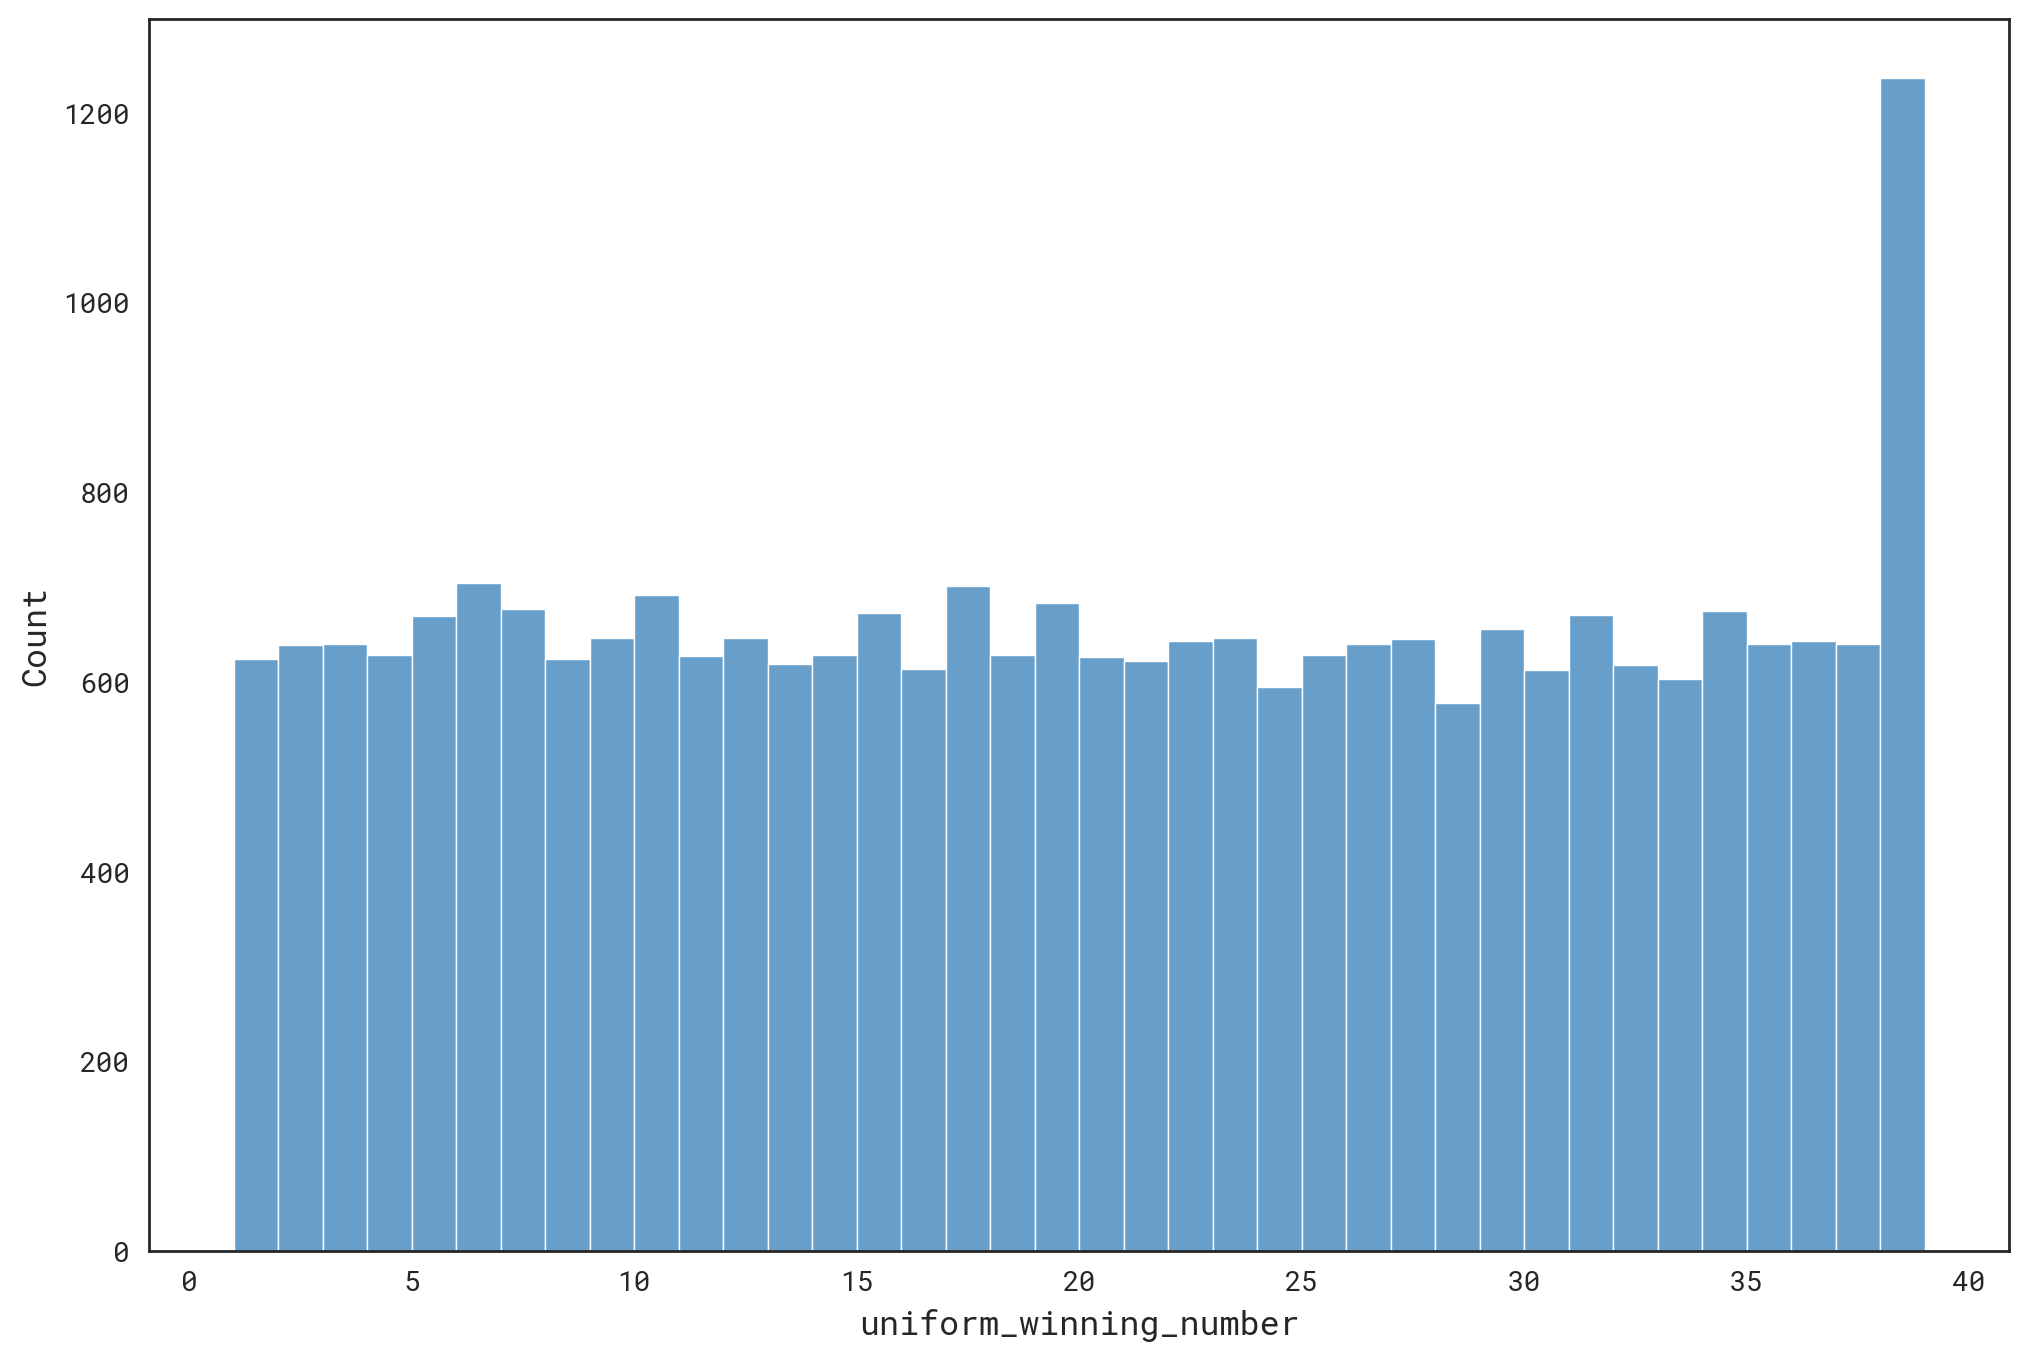

In [3]:
sns.histplot(df['uniform_winning_number'], color=COLOR, binwidth=1)

## What the CLT is NOT

Words matter a lot in definitions. CLT is NOT the distribution of samples taken from a distribution. That will always take the same shape as the original distribution.

We can see the practical demonstration of this misconception in the two code cells below.

In [4]:
samples_matrix = [[]]
for i in range(10):
    samples = samples_matrix[i] + np.random.choice(df['uniform_winning_number'], 100).tolist()
    samples_matrix.append(samples)

print(samples_matrix)

[[], [6, 4, 14, 31, 21, 10, 3, 32, 1, 33, 9, 3, 1, 11, 37, 9, 6, 20, 35, 4, 3, 19, 9, 24, 20, 3, 8, 19, 23, 35, 30, 3, 10, 30, 6, 2, 12, 10, 29, 11, 26, 20, 26, 12, 5, 3, 20, 39, 10, 2, 35, 20, 4, 5, 9, 14, 25, 36, 8, 9, 23, 30, 8, 16, 19, 29, 11, 15, 15, 20, 3, 26, 11, 17, 7, 25, 6, 14, 20, 35, 1, 35, 26, 9, 33, 19, 9, 1, 4, 22, 14, 9, 33, 34, 37, 8, 12, 2, 10, 26], [6, 4, 14, 31, 21, 10, 3, 32, 1, 33, 9, 3, 1, 11, 37, 9, 6, 20, 35, 4, 3, 19, 9, 24, 20, 3, 8, 19, 23, 35, 30, 3, 10, 30, 6, 2, 12, 10, 29, 11, 26, 20, 26, 12, 5, 3, 20, 39, 10, 2, 35, 20, 4, 5, 9, 14, 25, 36, 8, 9, 23, 30, 8, 16, 19, 29, 11, 15, 15, 20, 3, 26, 11, 17, 7, 25, 6, 14, 20, 35, 1, 35, 26, 9, 33, 19, 9, 1, 4, 22, 14, 9, 33, 34, 37, 8, 12, 2, 10, 26, 24, 14, 5, 20, 6, 38, 23, 25, 9, 17, 37, 12, 15, 10, 31, 5, 34, 16, 16, 39, 2, 32, 37, 8, 11, 3, 34, 5, 19, 4, 10, 6, 25, 35, 37, 39, 3, 30, 27, 26, 38, 15, 2, 12, 39, 2, 27, 1, 4, 24, 26, 4, 14, 11, 5, 34, 13, 17, 2, 19, 20, 38, 7, 19, 6, 10, 21, 36, 33, 22, 34, 5,

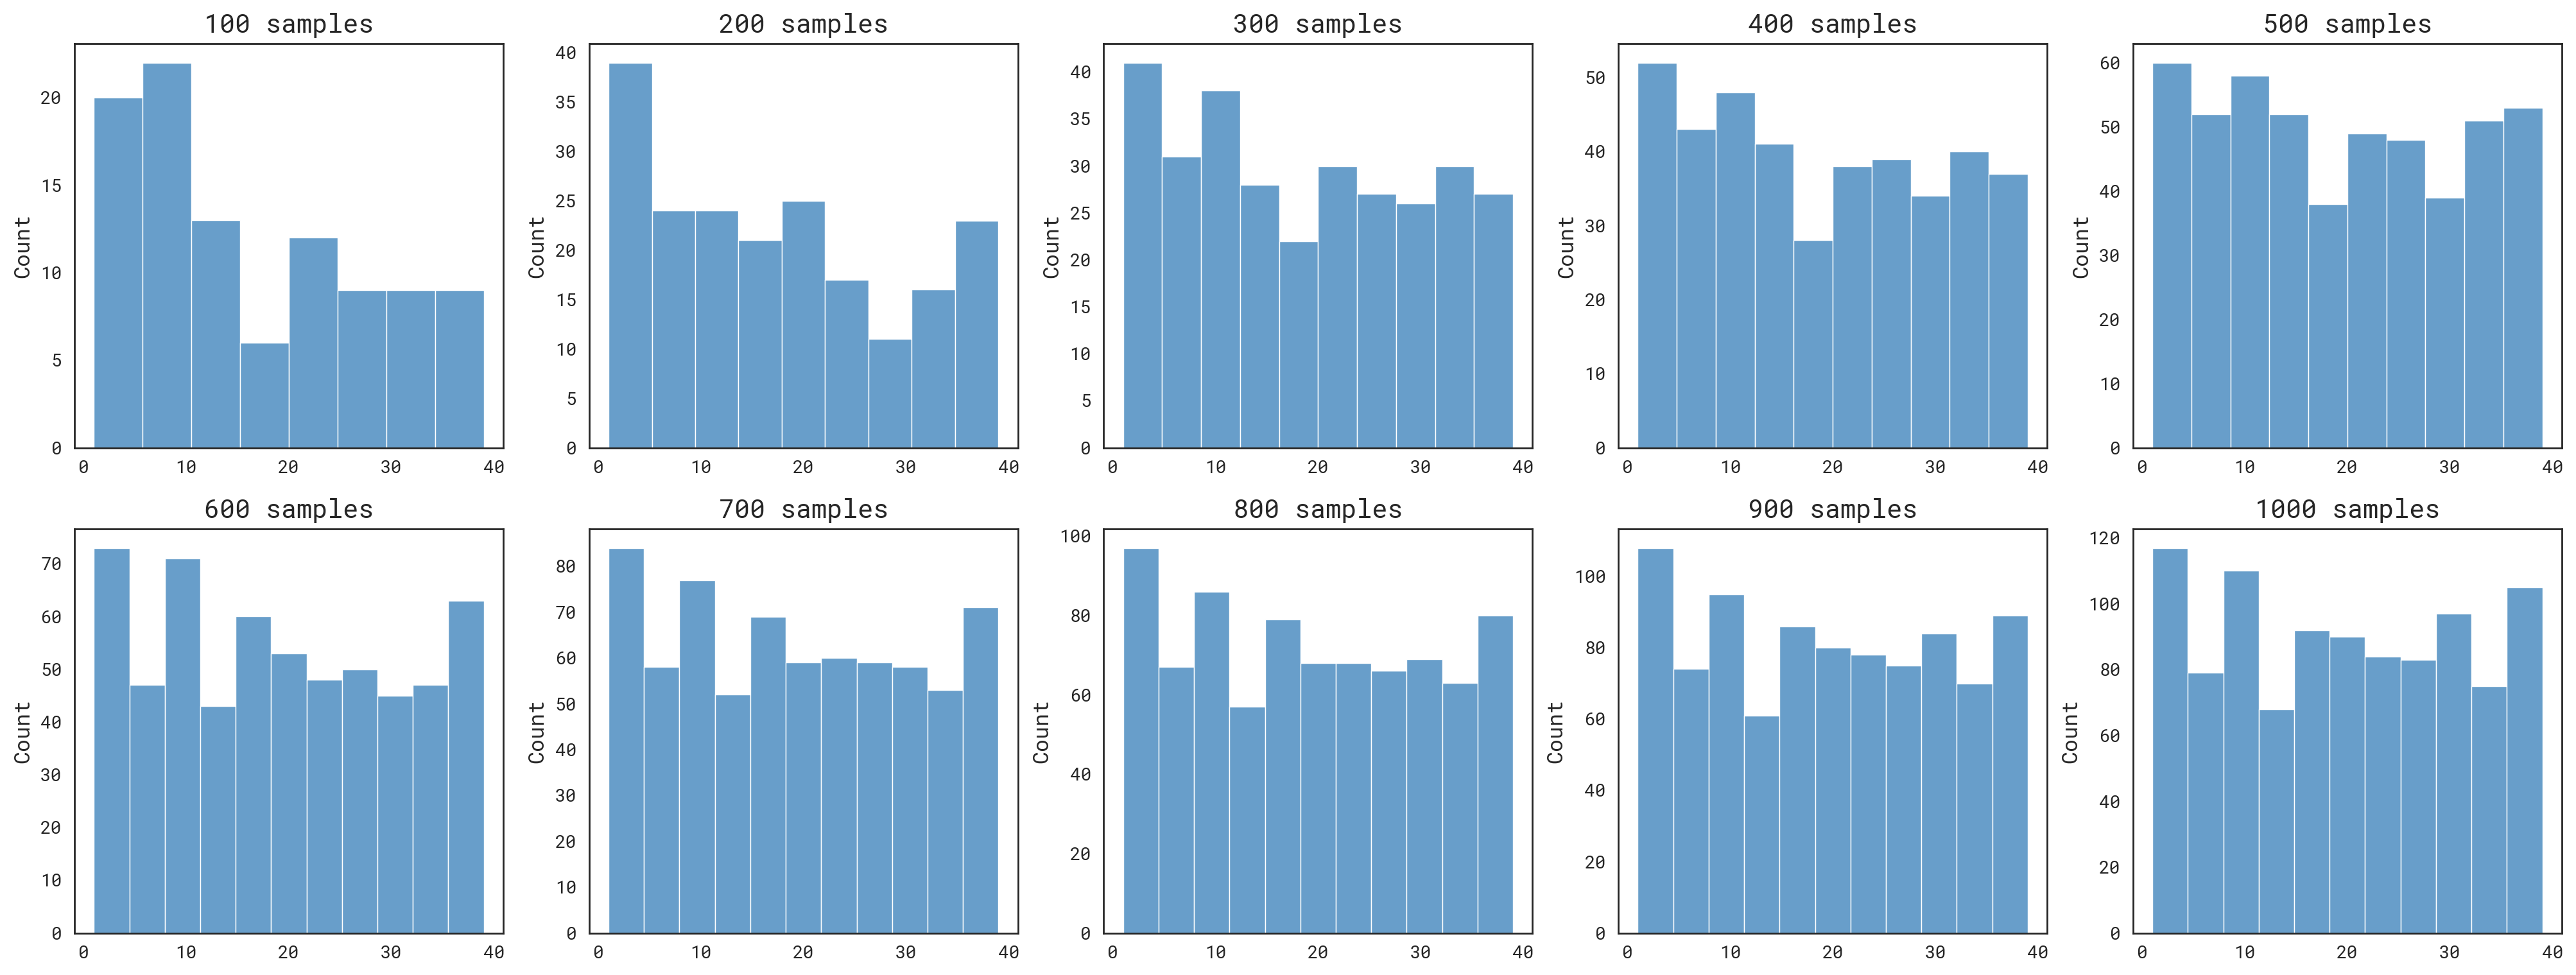

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(25,9))
for i in range(1, len(samples_matrix)):
    sns.histplot(samples_matrix[i], ax=axes[(i - 1) // 5, i - 1 if i < 6 else i - 5 - 1], color=COLOR)
    axes[(i - 1) // 5, i - 1 if i < 6 else i - 5 - 1].set_title("{} samples".format(len(samples_matrix[i])))

## CLT is the distribution of sample means

1. Take a bunch of samples.
2. Take their mean.
3. Repeat until you have a bunch of sample means.
4. Plot the sample means.

In [6]:
samples = []
for i in range(1000):
    sample_mean = float(np.mean(np.random.choice(df['uniform_winning_number'], 10)))
    samples.append(sample_mean)

print(samples[:5], len(samples))

[19.8, 21.5, 19.1, 16.4, 22.3] 1000


Plotting sample means from 10 to 100 samples, adding 10 sample means at a time.

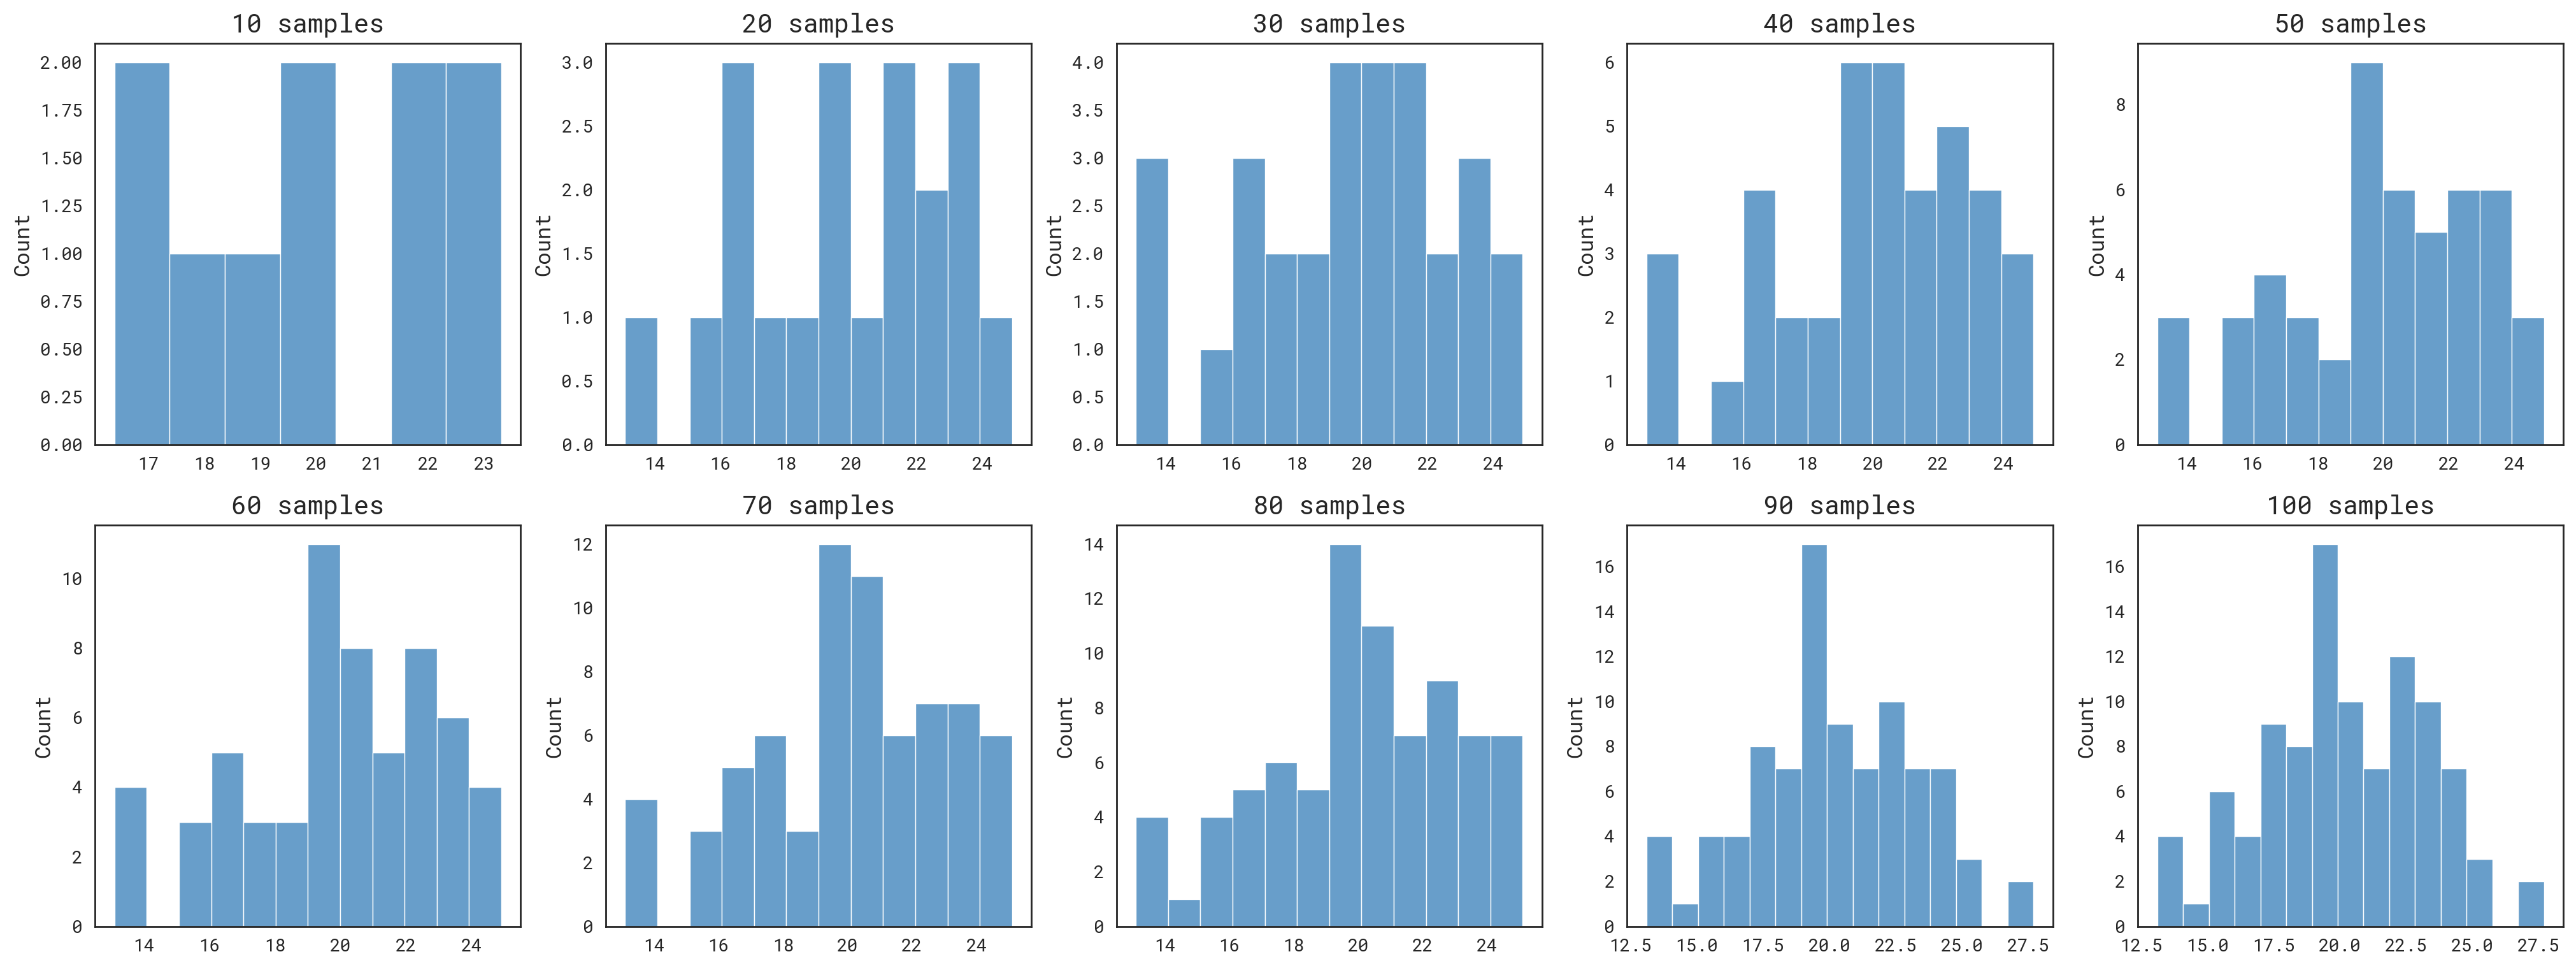

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(25,9))
lower, upper, jump = 0, 100, 10
for i in range(lower, upper, jump):
    row, col = i // (upper // 2), i // jump if i < (upper // 2) else (i - (upper // 2)) // jump
    sns.histplot(samples[:i + jump], ax=axes[row, col], binwidth=1, color=COLOR)
    axes[row, col].set_title("{} samples".format(len(samples[:i + jump])))

Plotting sample means from 100 to 1000 samples, adding 100 sample means at a time.

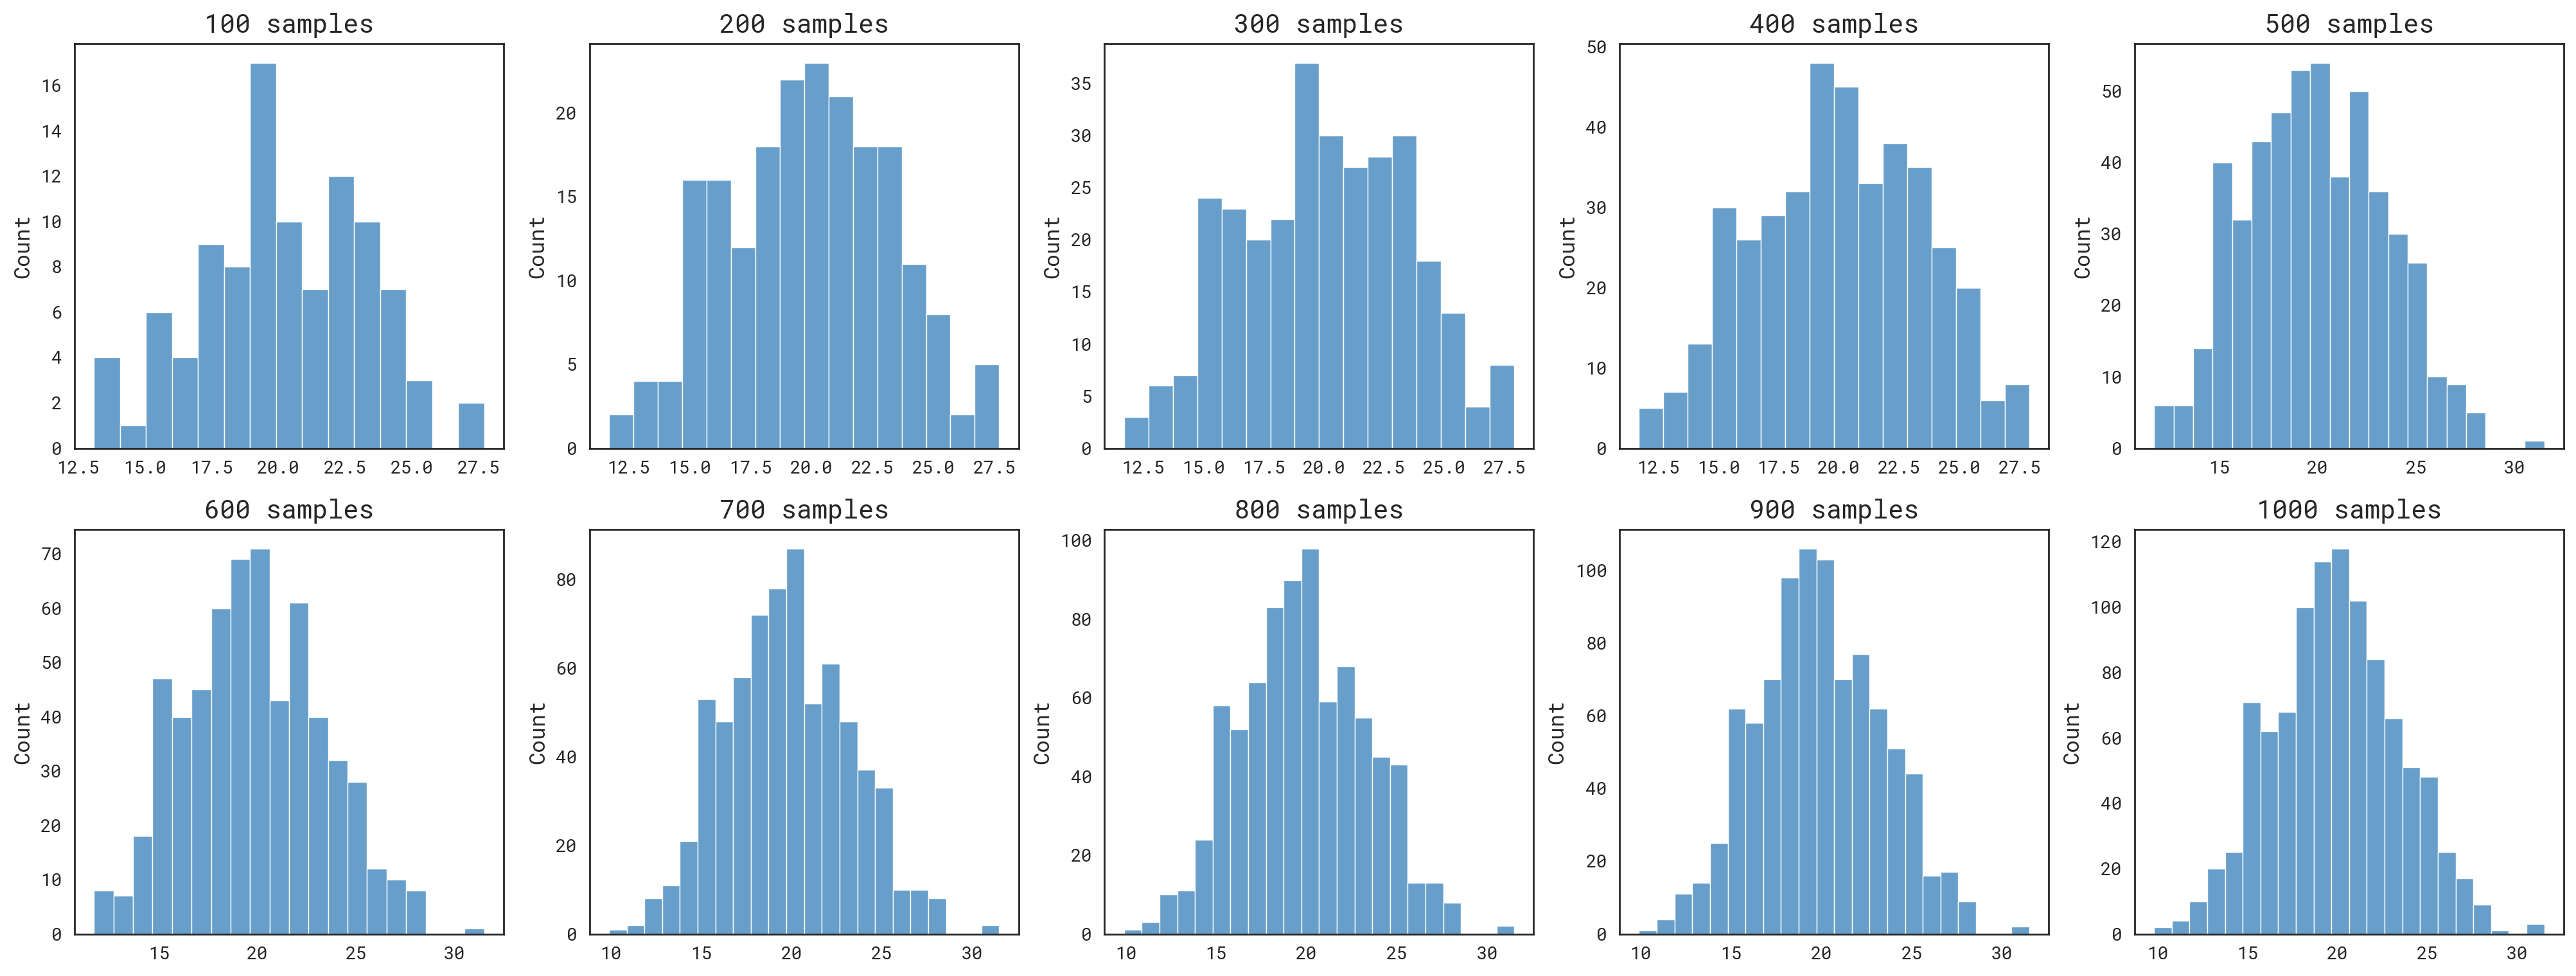

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(25,9))
lower, upper, jump = 0, 1000, 100
for i in range(lower, upper, jump):
    row, col = i // (upper // 2), i // 100 if i < (upper // 2) else (i - (upper // 2)) // 100
    sns.histplot(samples[:i + jump], ax=axes[row, col], binwidth=1, color=COLOR)
    axes[row, col].set_title("{} samples".format(len(samples[:i + jump])))

We can see that the distribution of the sample means starts to take the shape of a normal distribution as we take more and more sample means.